### Classification of passengers survived in titanic

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [253]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


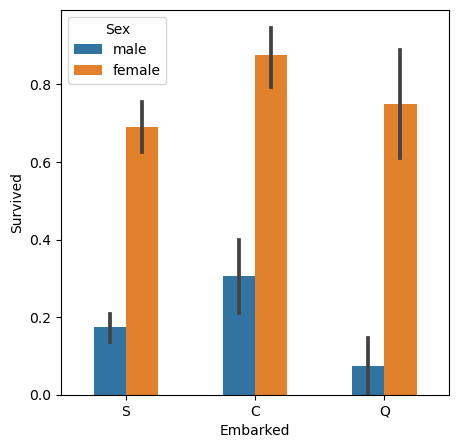

In [254]:
plt.figure(figsize=(5,5))
sns.barplot(x='Embarked',y='Survived',hue="Sex", data=train,width=0.5)
plt.show()

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [256]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data cleaning and transformation

In [257]:
# Create age bins to avoid overfitting on Age data
def transform_age(df):
    df.Age = df.Age.fillna(-0.5)
    bins=(-1, 0, 5, 12, 20, 25, 35, 60, 100)
    group_name=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    age_bin= pd.cut(df.Age,bins,labels=group_name)
    df.insert(df.columns.get_loc('Age'),'age_bin',age_bin)
    return(df)

In [258]:
#Remove number from cabin values
def transform_cabin(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return(df)

In [259]:
#Create Fare bins
def transform_fare(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    fare_bin = pd.cut(df.Fare,bins,labels=group_names)
    df.insert(df.columns.get_loc('Fare'),'fare_bin',fare_bin)
    return(df)

In [260]:
#Transform Name
def transform_name(df):
    df['Lname']= df.Name.apply(lambda x: x.split(' ')[0])
    df['Prefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return(df)

In [261]:
# Drop Features that are not required
def drop_feat(df):
    return df.drop(columns=['Ticket', 'Name', 'Embarked','Age','Fare'])

In [262]:
def transform_features(df):
    df = transform_age(df)
    #df = transform_name(df)
    df = transform_cabin(df)
    df = transform_fare(df)
    df = drop_feat(df)
    return(df)

In [263]:
train = transform_features(train)
test = transform_features(test)

### Feature Encoding for Categorical variables

In [264]:
from sklearn .preprocessing import LabelEncoder

In [267]:
def encoder(df_train,df_test):
    features = ['fare_bin','Cabin','Sex','age_bin']
    df_combined = pd.concat([df_train[features],df_test[features]])
    
    for feature in features:
        le = LabelEncoder()
        le=le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train,df_test


In [268]:
train,test = encoder(train,test)

In [269]:
train.head()

,PassengerId,Survived,Pclass,Sex,age_bin,SibSp,Parch,fare_bin,Cabin
0,1,0,3,1,4,1,0,0,7
1,2,1,1,0,0,1,0,3,2
2,3,1,3,0,7,0,0,0,7
3,4,1,1,0,7,1,0,3,2
4,5,0,3,1,7,0,0,1,7


In [270]:
test.head()

,PassengerId,Pclass,Sex,age_bin,SibSp,Parch,fare_bin,Cabin
0,892,3,1,7,0,0,0,7
1,893,3,0,0,1,0,0,7
2,894,2,1,3,0,0,1,7
3,895,3,1,7,0,0,1,7
4,896,3,0,4,1,1,1,7


In [271]:
#Train-test split
from sklearn.model_selection import train_test_split

x = train.drop(columns=['PassengerId','Survived'])
y = train.Survived
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=23)

### Model Fitting

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [288]:
rfc = RandomForestClassifier()

In [289]:
parameter_dist={'n_estimators': [20,40,50], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

In [290]:
gscv = GridSearchCV(estimator=rfc,param_grid=parameter_dist,scoring=acc_score,n_jobs=-1,verbose=3)

In [291]:
gscv_obj = gscv.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [292]:
y_pred = gscv.predict(x_test)
accuracy_score(y_test,y_pred)

0.8379888268156425

In [293]:
 gscv_obj.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5, n_estimators=50)

In [294]:
rfc = gscv_obj.best_estimator_

In [295]:
rfc.fit(x_train,y_train)
y_pred1 = rfc.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8435754189944135

### Validating the model's efficiency using Kfold Validation

In [296]:
from sklearn.model_selection import KFold

In [300]:
def kfold_val(rfc):
    kf = KFold(n_splits=10)
    fold = 0
    result = []
    for train_index,test_index in kf.split(x):
        fold +=1
        x_train,x_test = x.values[train_index], x.values[test_index]
        y_train,y_test = y.values[train_index], y.values[test_index]
        rfc.fit(x_train,y_train)
        prediction = rfc.predict(x_test)
        accuracy = accuracy_score(y_test,prediction)
        result.append(accuracy)
        print("Fold: {0} Accuracy: {1}".format(fold,accuracy))
    
    AVG_Accuracy = np.mean(result)
    print("Average accuracy is {0}".format(AVG_Accuracy))

In [301]:
kfold_val(rfc)

Fold: 1 Accuracy: 0.7888888888888889
Fold: 2 Accuracy: 0.8539325842696629
Fold: 3 Accuracy: 0.7752808988764045
Fold: 4 Accuracy: 0.8426966292134831
Fold: 5 Accuracy: 0.8876404494382022
Fold: 6 Accuracy: 0.8426966292134831
Fold: 7 Accuracy: 0.8202247191011236
Fold: 8 Accuracy: 0.7752808988764045
Fold: 9 Accuracy: 0.8539325842696629
Fold: 10 Accuracy: 0.8202247191011236
Average accuracy is 0.826079900124844


### Predict on actual test data

In [302]:
id = test['PassengerId']
pred = rfc.predict(test.drop(columns="PassengerId"))
Result = pd.DataFrame({'PassengerID': id,'Survived':pred})


C:\Users\vaish\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [303]:
Result

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
